In [16]:
from spacerocks import SpaceRock, RockCollection
from spacerocks.time import Time
from spacerocks.observing import Observatory
from spacerocks.spice import SpiceKernel
from spacerocks.nbody import Simulation, Integrator, Force

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# kernel = SpiceKernel()
# kernel.load("/Users/kjnapier/data/spice/latest_leapseconds.tls")
# kernel.load("/Users/kjnapier/data/spice/de440s.bsp")
# kernel.load("/Users/kjnapier/data/spice/sb441-n16s.bsp")

kernel = SpiceKernel.defaults()


Using default configuration:
  Kernel paths: ["/Users/kjnapier/.spacerocks/spice"]
  Download directory: "/Users/kjnapier/.spacerocks/spice"
  Auto-download: true

Processing kernel: latest_leapseconds.tls
✓ Found existing kernel at: /Users/kjnapier/.spacerocks/spice/latest_leapseconds.tls
Loading kernel: /Users/kjnapier/.spacerocks/spice/latest_leapseconds.tls

Processing kernel: de440s.bsp
✓ Found existing kernel at: /Users/kjnapier/.spacerocks/spice/de440s.bsp
Loading kernel: /Users/kjnapier/.spacerocks/spice/de440s.bsp

Processing kernel: earth_1962_240827_2124_combined.bpc
✓ Found existing kernel at: /Users/kjnapier/.spacerocks/spice/earth_1962_240827_2124_combined.bpc
Loading kernel: /Users/kjnapier/.spacerocks/spice/earth_1962_240827_2124_combined.bpc


In [17]:
origin = "SSB"
reference_plane = "EclipJ2000"

In [18]:
epoch = Time.now()
t0 = epoch.epoch
duration = 100_000 * 365.25
step_frquency = 10 * 365.25
nsteps = int(duration / step_frquency)
epochs = [epoch + duration / nsteps * idx for idx in range(nsteps)]

In [19]:
while True:
    rock = SpaceRock.random(epoch=epoch, reference_plane=reference_plane, origin=origin)
    if rock.e() < 1.0:
        if rock.q() < 10.0:
            break
        
name = rock.name

In [20]:
rock.q()

5.340603139072063

In [21]:
sim = Simulation.planets(rock.epoch, "ECLIPJ2000", origin)
sim.set_integrator(Integrator.ias15(2.0))
sim.add(rock)

sim.move_to_center_of_mass()

In [22]:
sim

Simulation:
    Epoch: 2460697.4177567656 TDB JD
    Reference Plane: ECLIPJ2000
    Origin: simulation_barycenter
    Timestep: 2

In [23]:
sim.integrate(epochs[0])

In [26]:
import tqdm

In [27]:
results = RockCollection()

for epoch in tqdm.tqdm(epochs):
    sim.integrate(epoch)
    rock = sim.get_particle(name)
    results.add(rock)

 39%|███▊      | 3863/10000 [02:07<03:22, 30.36it/s]


KeyboardInterrupt: 

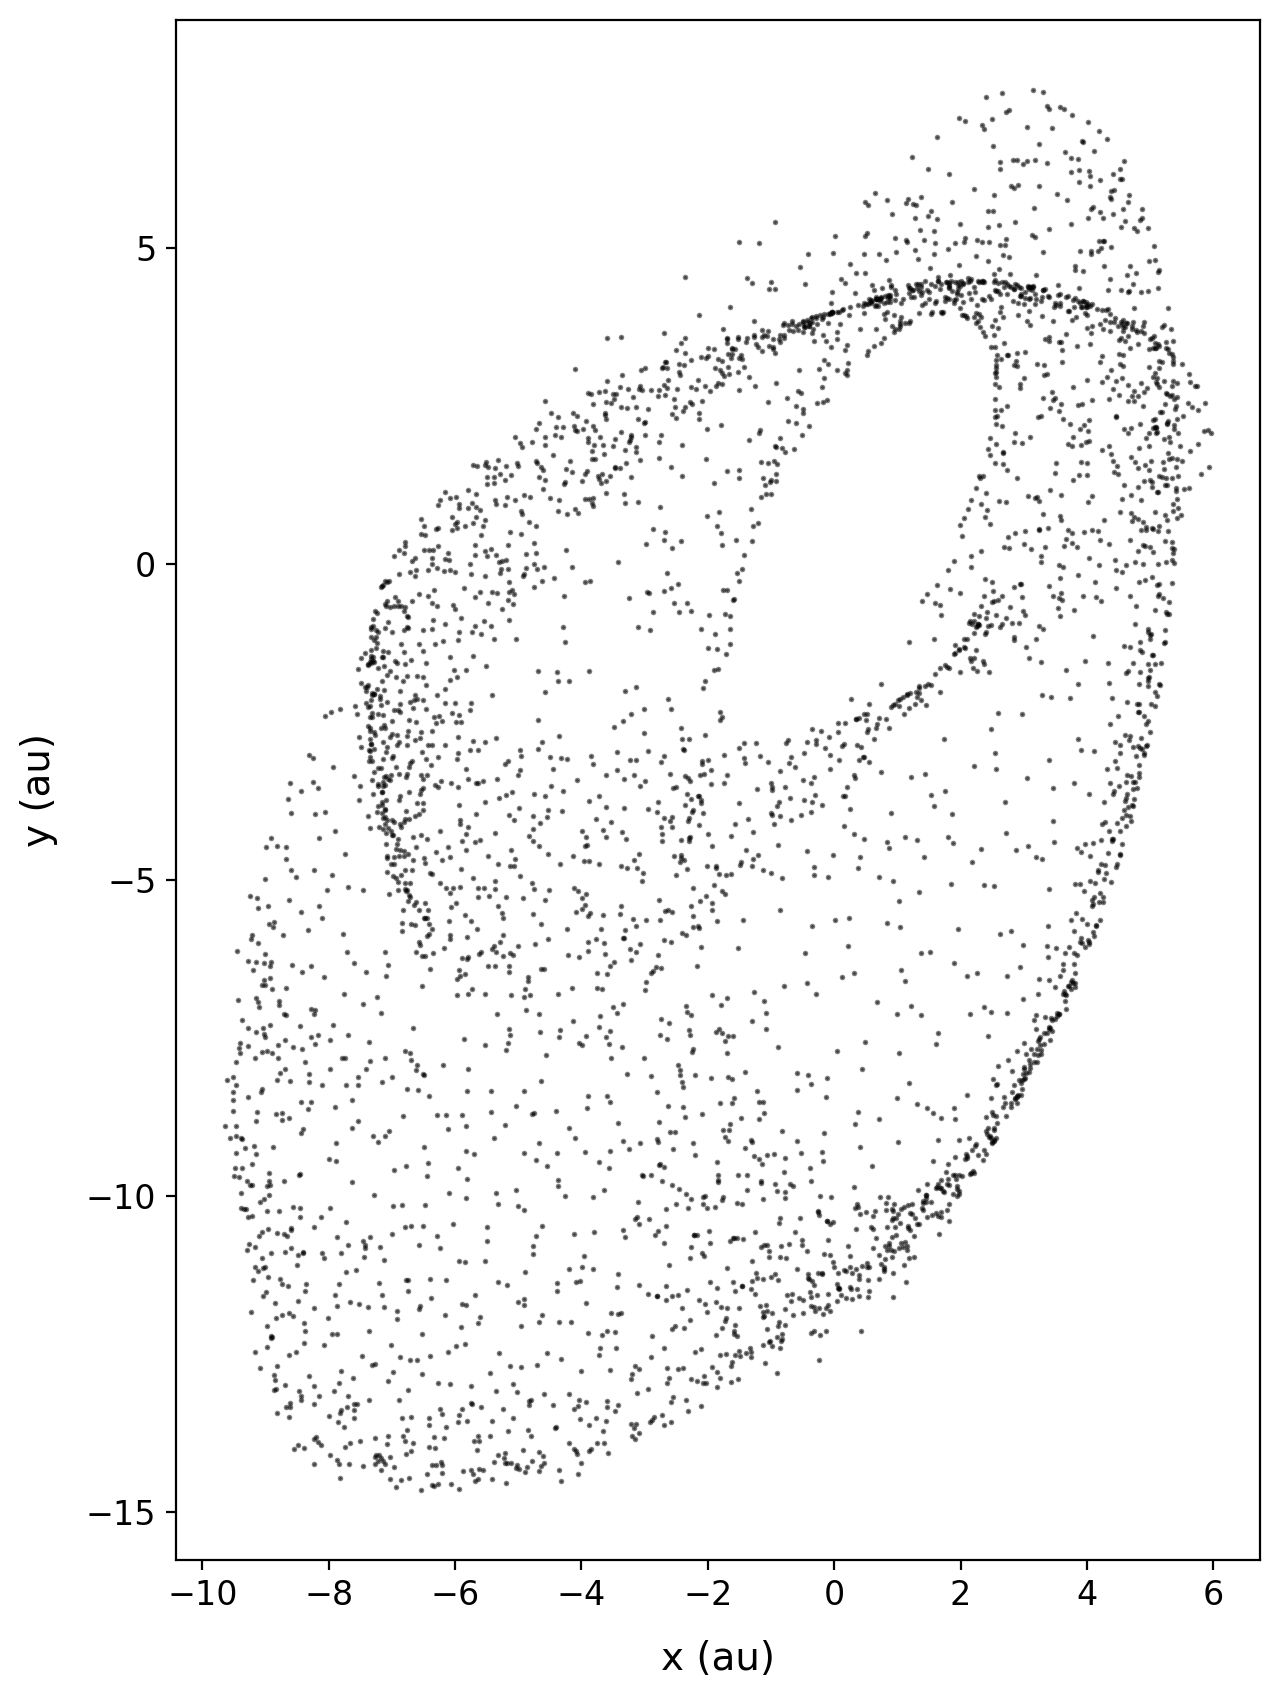

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(results.x, results.y, s=1, c='black', alpha=0.5)
ax.set_aspect('equal')
ax.set_xlabel('x (au)', fontsize=14, labelpad=10)
ax.set_ylabel('y (au)', fontsize=14, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=12)

In [11]:
years = [(epoch.jd() - epochs[0].jd()) / 365.25 for epoch in epochs]

Text(0.5, 0, 'Time (years)')

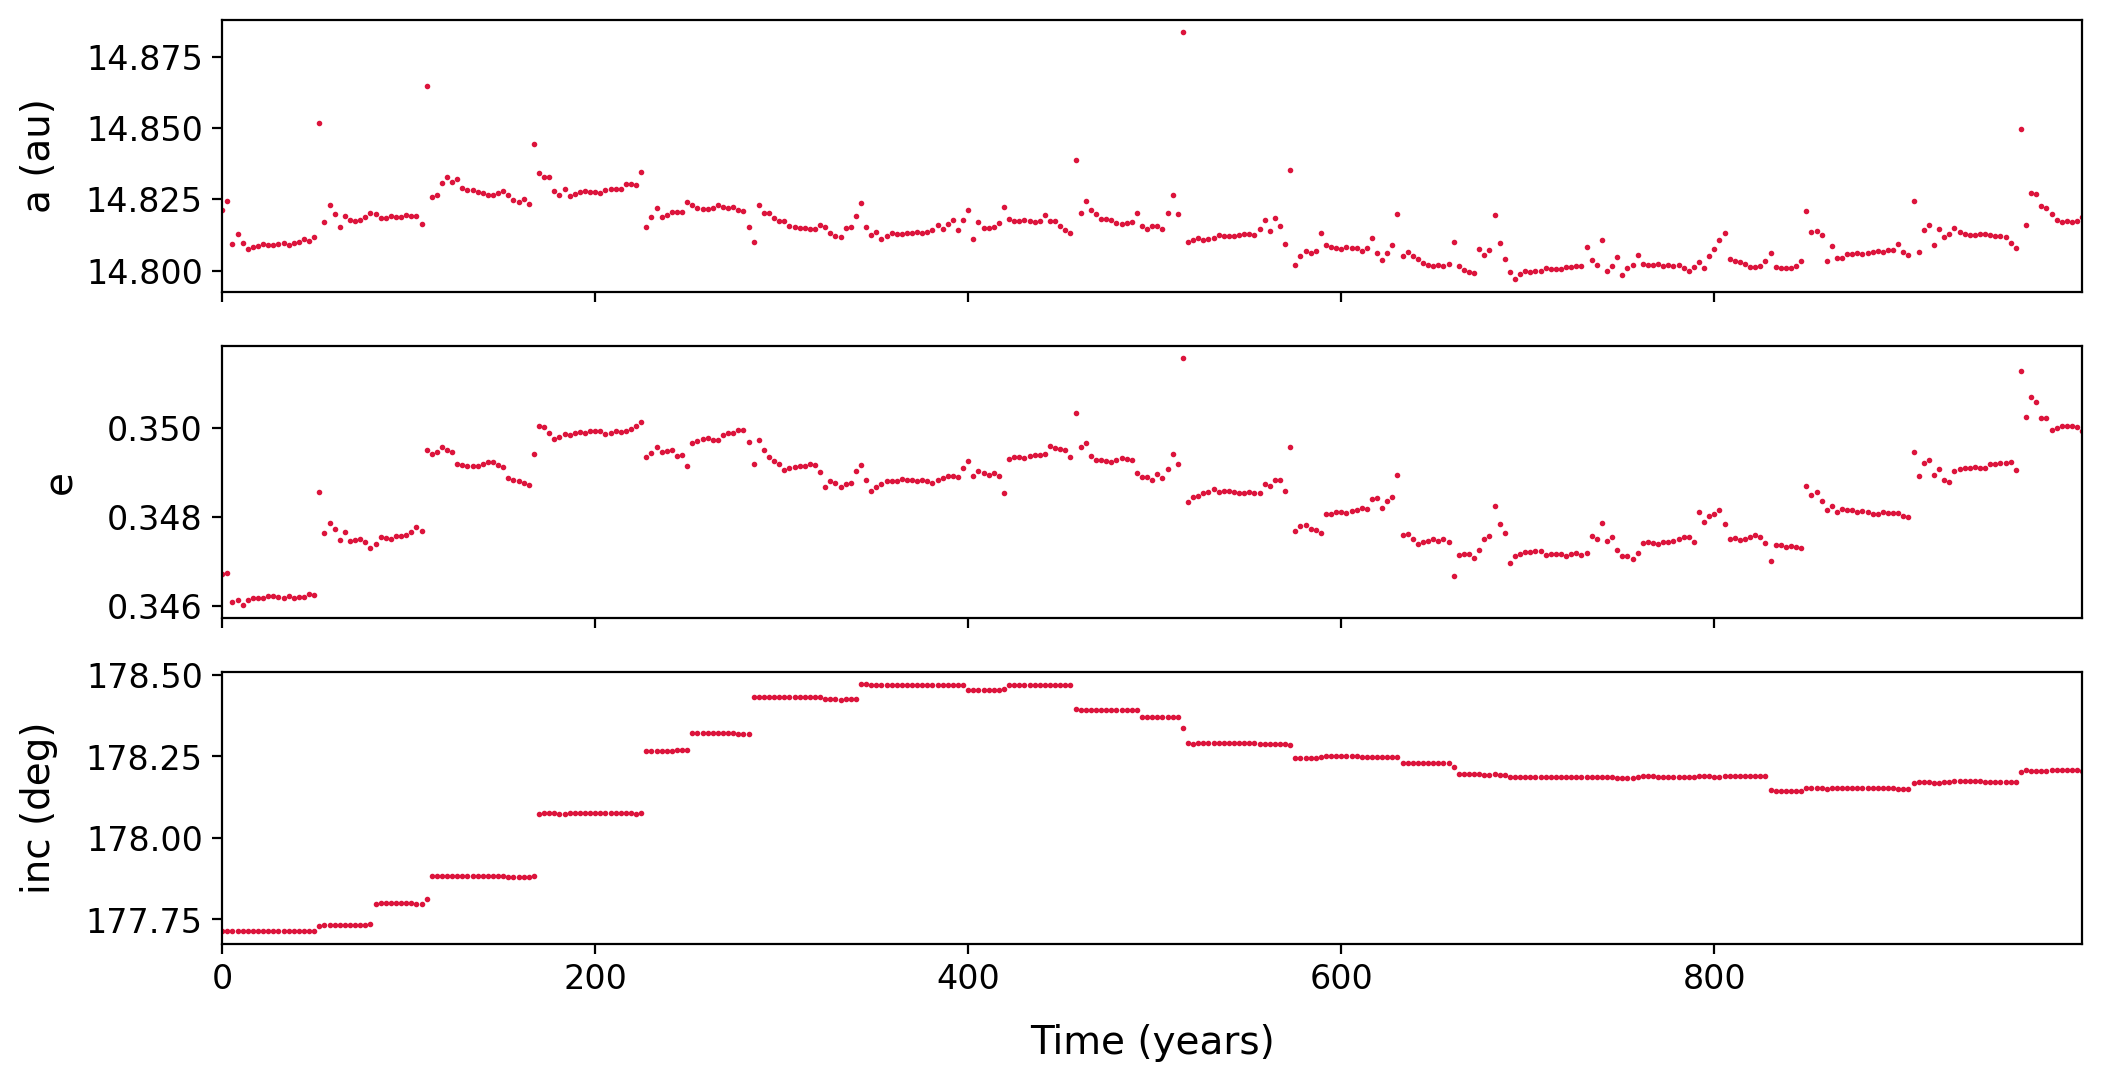

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(12, 6), sharex=True)
ax[0].scatter(years, results.a(), color='crimson', s=1)
ax[0].set_ylabel('a (au)', fontsize=14, labelpad=10)
ax[1].scatter(years, results.e(), color='crimson', s=1)
ax[1].set_ylabel('e', fontsize=14, labelpad=10)
ax[2].scatter(years, np.degrees(results.inc()), color='crimson', s=1)
ax[2].set_ylabel('inc (deg)', fontsize=14, labelpad=10)

for idx in range(3):
    ax[idx].tick_params(axis='both', which='major', labelsize=12)
    ax[idx].set_xlim(years[0], years[-1])
    #ax[idx].set_ylim(bottom=0.0)
    
ax[2].set_xlabel('Time (years)', fontsize=14, labelpad=10)